<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 12</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 11. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Integration auf Irrwegen</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir die zwei-dimensionale Funktion
\begin{equation}
f(x,y) = \cos(x^2+y^2)\quad e^{-x^2-y^2}
\end{equation}

betrachten, welche über den gesamten Bereich $\mathbb{R}^2$ integriert werden soll, d.h. wir wollen das Integral
\begin{equation}
I = \int\limits_{\mathbb{R}^2} f(x,y)\; \text{d}x\, \text{d}y
\end{equation}
berechnen. 

In der anderen Aufgabe dieser Woche haben wir bereits gesehen, dass wir das Integral besonders gut annähern können, indem wir ein sogenanntes **importance sampling** durchführen. Dabei generieren wir zufällige Koordinaten $(x,y)$ nicht gleichverteilt, sondern gemäss einer Verteilung $P(x,y)$, die der zu integrierenden Funktion ähnelt (und welche wir leicht erzeugen können). Dann gilt:
\begin{equation}
I = \int\limits_{\mathbb{R}^2} f(x,y)\; \text{d}x\, \text{d}y = \int\limits_{\mathbb{R}^2} \frac{f(x,y)}{P(x,y)} P(x,y)\; \text{d}x\, \text{d}y \approx \frac{1}{N}\sum\limits_{i=1}^{N}\frac{f(x_i,y_i)}{P(x_i,y_i)} \,,
\end{equation}
wobei die $(x_i,y_i)$ in der Annäherung im letzten Term $P$-verteilte Koordinaten seien. 

Als Verteilung $P(x,y)$ für die zu integrierende Funktion $f(x,y)$ können wir etwa eine Normalverteilung der Form
\begin{equation*}
P(x,y) = \frac{1}{\pi}e^{-x^2-y^2},
\end{equation*}
wählen.
Um eine **Markov-Kette** von Koordinaten $(x_i,y_i)$ entsprechend dieser Verteilung zu generieren, wollen wir den **Metropolis-Algorithmus** nutzen. Impementieren Sie dazu zunächst diesen Algorithmus. 

In [1]:
# probabilities
P(x, y) = exp(-x^2 - y^2) / pi
P(x::Array) = P(x[1], x[2])

function Metropolis_2D(x, p; h=1, N=100, path=false)
    output = Array[x]
    
    while length(output) <= N
        dx = (rand(size(x, 1))-1/2)*2h
        tmp = output[end] .+ dx
        if rand() <= p(tmp)/p(output[end])
            push!(output, tmp)
        end
    end
    
    path == false && return output[end]
    return output[2:end]
end

Metropolis_2D (generic function with 1 method)

Visualisieren Sie die Markov-Kette indem Sie $10^5$ zufällige Koordinaten $(x_i, y_i)$ erzeugen und damit den "Pfad" der Markov-Kette nachzeichnen. Zeichnen Sie die dabei die einzelnen Wegsegmente mit einer starken Transparenz, damit deutlich wird, wo besonders viele Koordinaten erzeugt werden. Die Transparenz (den sogenannten $\alpha$-Wert) können Sie wie folgt einstellen:

```
plot(x_values, y_values, marker="o", linestyle="", alpha=0.02).
```

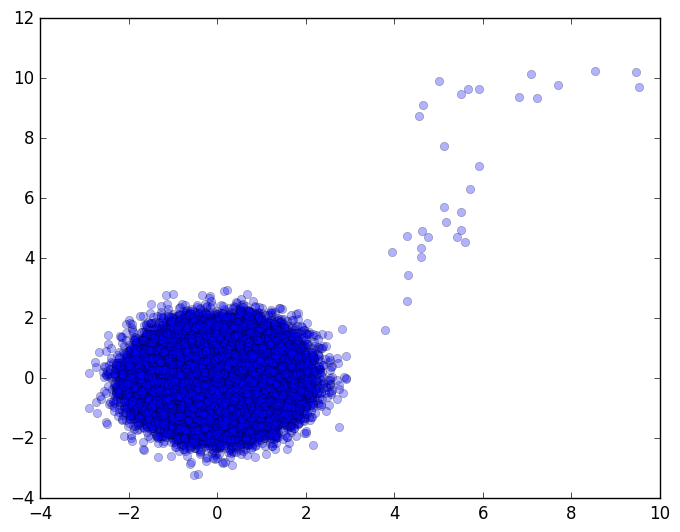

In [2]:
using PyPlot

points = Metropolis_2D([10, 10], P, N=1e5, path=true)
xs = []
ys = []

for v in points
    push!(xs, v[1])
    push!(ys, v[2])
end

figure()
plot(xs, ys, marker="o", linestyle="", alpha=0.3)
;

Nachdem wir uns nun visuell vergewissern konnten, dass unsere Zufallszahlen sinnvoll erzeugt werden, sollen Sie nun das eigentliche Integral berechnen.

Der exakte Wert des Integrals ist $I=\pi/2$. Berechnen Sie das Integral jeweils mit $N=10^4, 10^5, 10^6, 5\times 10^6$ Zufallszahlen und plotten Sie den absoluten Fehler als Funktion von $N$.